In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from math import sqrt

# Задание 1. 

Поработайте с датасетом про цены мобильных телефонов, обучите регрессию. 

In [2]:
data = pd.read_csv('Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
data.drop(columns=['Product_id'], inplace=True)

In [4]:
for col in data:
    print(col, sorted(data[col].unique()), sep='\n')

Price
[614, 628, 705, 754, 791, 833, 1238, 1302, 1315, 1347, 1357, 1390, 1396, 1421, 1511, 1522, 1612, 1646, 1676, 1734, 1741, 1749, 1777, 1810, 1831, 1843, 1916, 1921, 1942, 1950, 1984, 1989, 2001, 2006, 2044, 2054, 2087, 2124, 2137, 2174, 2258, 2266, 2276, 2323, 2343, 2357, 2392, 2409, 2438, 2445, 2466, 2491, 2508, 2536, 2562, 2571, 2580, 2654, 2685, 2714, 2744, 2746, 2824, 2858, 2859, 2880, 2938, 2975, 2977, 3005, 3055, 3102, 3116, 3211, 3260, 3287, 3316, 3551, 3658, 3837, 4361]
Sale
[10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 52, 57, 58, 66, 67, 71, 72, 73, 75, 82, 87, 89, 91, 93, 94, 96, 98, 100, 101, 103, 106, 109, 111, 113, 114, 119, 121, 140, 141, 143, 156, 164, 166, 178, 179, 187, 198, 201, 204, 206, 208, 213, 214, 256, 268, 285, 299, 302, 307, 308, 309, 344, 367, 373, 378, 382, 385, 393, 399, 418, 423, 427, 455, 456, 499, 523, 564, 567, 599, 615, 616, 678, 996, 1009, 1043, 1224, 1274, 1530, 1584, 1781, 1

In [5]:
len(data)

161

Удалим колонку со скидками (откуда в ней значения OVER NINE THOUSAND?..) и все строки, где значения какого-либо параметра равны нулю (они нерепрезентативны).

In [6]:
data.drop(columns=['Sale'], inplace=True)
data.drop(data[
    (data['Front_Cam'] == 0) |
    (data['RearCam'] == 0) |
    (data['cpu core'] == 0) |
    (data['cpu freq'] == 0) |
    (data['internal mem'] == 0) |
    (data['ram'] == 0)
    ].index, inplace=True)

In [7]:
for col in data:
    print(col, sorted(data[col].unique()), sep='\n')

Price
[1390, 1612, 1646, 1676, 1734, 1810, 1831, 1916, 1921, 1942, 1950, 1984, 1989, 2001, 2044, 2054, 2087, 2124, 2137, 2174, 2258, 2266, 2276, 2323, 2343, 2357, 2392, 2409, 2438, 2445, 2466, 2491, 2508, 2536, 2562, 2571, 2580, 2654, 2685, 2714, 2744, 2746, 2824, 2858, 2859, 2880, 2938, 2975, 2977, 3005, 3055, 3102, 3116, 3211, 3260, 3287, 3316, 3551, 3658, 3837, 4361]
weight
[97.0, 110.0, 112.0, 116.0, 118.0, 131.0, 135.0, 139.2, 140.0, 141.0, 142.0, 144.0, 145.0, 146.0, 147.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 156.0, 158.0, 160.0, 162.0, 167.8, 168.0, 169.0, 170.0, 171.0, 174.0, 175.0, 178.0, 179.0, 180.0, 183.0, 187.0, 194.8, 202.0, 238.0, 310.0, 393.0, 404.0, 489.0, 753.0]
resoloution
[4.0, 4.7, 4.8, 5.0, 5.1, 5.15, 5.2, 5.3, 5.43, 5.46, 5.5, 5.6, 5.7, 6.0, 8.0, 10.1, 12.2]
ppi
[160, 184, 187, 189, 220, 224, 245, 247, 258, 277, 282, 283, 294, 306, 312, 367, 386, 401, 403, 424, 428, 432, 440, 441, 469, 513, 515, 524, 534, 538, 541, 577, 806]
cpu core
[4, 6, 8]
cpu freq
[1.0

In [8]:
len(data)

119

In [9]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 158.88128076469718 test: 207.81679482939043


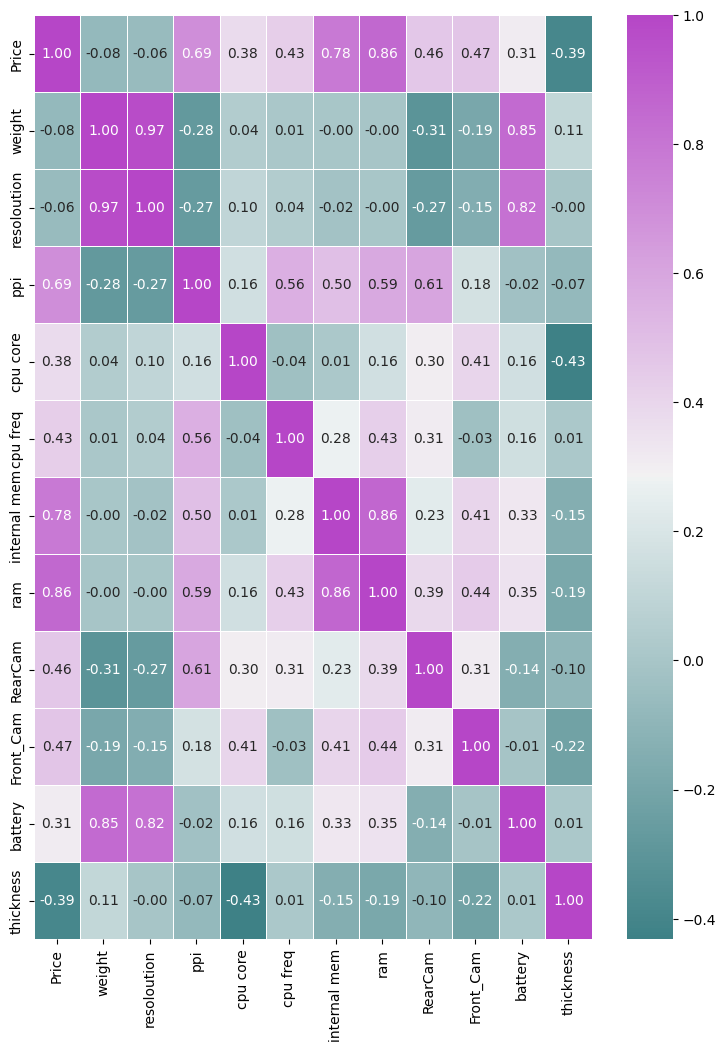

In [10]:
plt.figure(figsize=(9,12))
corr = data.corr()
g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(200,300,as_cmap=True))

С ценой слабо коррелируют вес и разрешение, при этом они оба сильно коррелируют с объёмом батареи. Попробуем их убрать.

In [11]:
data1 = data.drop(columns=['weight', 'resoloution'])

In [12]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
X = data1.drop(columns=['Price'])
y = data1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 178.83547289485284 test: 222.01328307497667


Похоже, что становится хуже. Попробуем нормализации на обоих датасетах.

In [13]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, 
                   random_state=179)
X = data.drop(columns=['Price'])
y = data['Price']
lasso_cv.fit(X, y)
print(f'Alpha = {lasso_cv.alpha_}')

Alpha = 10.0


In [14]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=lasso_cv.alpha_))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

pipe1.fit(X_train, y_train)
ypred_train = pipe1.predict(X_train)
ypred_test = pipe1.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 166.6163093033823 test: 221.06800454671466


In [15]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, 
                   random_state=179)
X = data1.drop(columns=['Price'])
y = data1['Price']
lasso_cv.fit(X, y)
print(f'Alpha = {lasso_cv.alpha_}')

Alpha = 10.0


In [16]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=lasso_cv.alpha_))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

pipe1.fit(X_train, y_train)
ypred_train = pipe1.predict(X_train)
ypred_test = pipe1.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 180.18266925485668 test: 234.32462899076606


In [17]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
X = data.drop(columns=['Price'])
y = data['Price']
ridge_cv.fit(X, y)
print(f'Alpha = {ridge_cv.alpha_}')

Alpha = 54.78901179593945


In [18]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=ridge_cv.alpha_))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

pipe2.fit(X_train, y_train)
ypred_train = pipe2.predict(X_train)
ypred_test = pipe2.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 196.02163565748538 test: 272.8523837304831


In [19]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
X = data1.drop(columns=['Price'])
y = data1['Price']
ridge_cv.fit(X, y)
print(f'Alpha = {ridge_cv.alpha_}')

Alpha = 23.81685551976158


In [20]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=ridge_cv.alpha_))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

pipe2.fit(X_train, y_train)
ypred_train = pipe2.predict(X_train)
ypred_test = pipe2.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 185.3932184421905 test: 243.7577780724103


In [21]:
regressor = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=179)
X = data.drop(columns=['Price'])
y = data['Price']
regressor.fit(X, y)
print(regressor.coef_, regressor.intercept_, sep='\n')

[ -1.32028718 -26.66005473   1.47310734  38.95691439  31.66822464
   5.68711519  67.78709372   3.15411525  11.14688572   0.16939259
 -80.76171893]
1704.8875948984319


In [22]:
regressor = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=179)
X = data1.drop(columns=['Price'])
y = data1['Price']
regressor.fit(X, y)
print(regressor.coef_, regressor.intercept_, sep='\n')

[ 1.60405257e+00  4.33127606e+01  3.05308178e+01  6.70848302e+00
  7.64488029e+01  3.79101763e+00  1.21528394e+01  5.20267404e-02
 -8.06359119e+01]
1548.3876711514163


# Задание 2. 

Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест). Целевая колонка - change. 

In [23]:
data = pd.read_csv('diet_data.csv')
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [24]:
len(data)

151

In [25]:
data.dropna(inplace=True)
len(data)

140

In [26]:
for col in data:
    print(col, data[col].dtype, sorted(data[col].unique()), sep='\n')

Date
object
['10/1/2018', '10/10/2018', '10/11/2018', '10/12/2018', '10/13/2018', '10/14/2018', '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018', '10/19/2018', '10/2/2018', '10/20/2018', '10/21/2018', '10/22/2018', '10/23/2018', '10/24/2018', '10/25/2018', '10/26/2018', '10/27/2018', '10/28/2018', '10/29/2018', '10/3/2018', '10/30/2018', '10/31/2018', '10/4/2018', '10/5/2018', '10/6/2018', '10/7/2018', '10/8/2018', '10/9/2018', '11/1/2018', '11/10/2018', '11/11/2018', '11/12/2018', '11/13/2018', '11/14/2018', '11/15/2018', '11/16/2018', '11/17/2018', '11/18/2018', '11/19/2018', '11/2/2018', '11/20/2018', '11/21/2018', '11/22/2018', '11/23/2018', '11/24/2018', '11/25/2018', '11/26/2018', '11/27/2018', '11/28/2018', '11/29/2018', '11/3/2018', '11/30/2018', '11/4/2018', '11/5/2018', '11/6/2018', '11/7/2018', '11/8/2018', '11/9/2018', '12/1/2018', '12/10/2018', '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018', '12/15/2018', '12/16/2018', '12/17/2018', '12/18/2018', '12/19/2018'

Отбросим колонку с датой и приведём cals_per_oz к числу. Кроме того, колонка weight_oz взаимно-однозначно соответствует трём колонкам Stone, Pounds и Ounces, поэтому эти три мы тоже отбросим.

In [27]:
data.drop(columns=['Date', 'Stone', 'Pounds', 'Ounces'], inplace=True)
data['cals_per_oz'] = data['cals_per_oz'].astype('float')

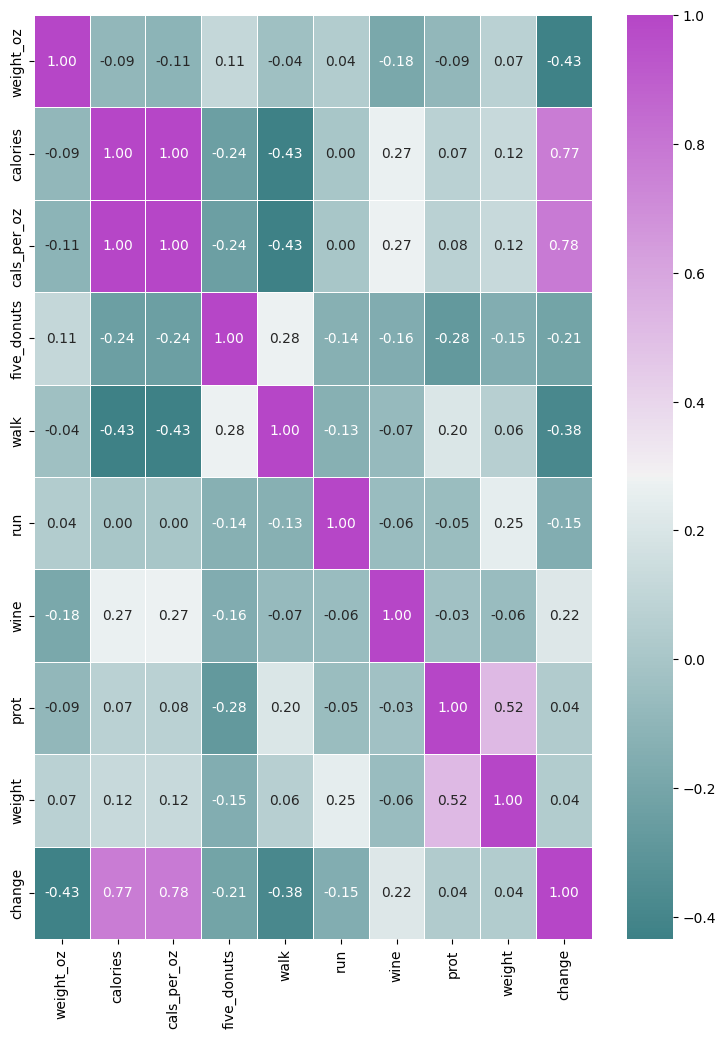

In [28]:
plt.figure(figsize=(9,12))
corr = data.corr()
g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(200,300,as_cmap=True))

Калории и калории на унцию абсолютно коррелируют друг с другом, поэтому одну из этих колонок надо удалить.

In [29]:
data.drop(columns=['calories'], inplace=True)

In [30]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
X = data.drop(columns=['change'])
y = data['change']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 12.629134141685421 test: 10.442721711748783


In [31]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, 
                   random_state=179)
lasso_cv.fit(X, y)
print(f'Alpha = {lasso_cv.alpha_}')

Alpha = 0.2989949748743719


In [32]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=lasso_cv.alpha_))])

pipe1.fit(X_train, y_train)
ypred_train = pipe1.predict(X_train)
ypred_test = pipe1.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 12.68016159603199 test: 10.273124054212019


In [33]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)
print(f'Alpha = {ridge_cv.alpha_}')

Alpha = 1.0234114021054528


In [34]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=ridge_cv.alpha_))])

pipe2.fit(X_train, y_train)
ypred_train = pipe2.predict(X_train)
ypred_test = pipe2.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 12.630734160270194 test: 10.487114521523566


In [35]:
regressor = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=179)
regressor.fit(X, y)
print(regressor.coef_, regressor.intercept_, sep='\n')

[-0.33641657 16.6415383  -0.96407683 -5.54135203 -3.24304031  0.25636874
 -0.          0.48171639]
887.6404360955688


# Задание 3. 

Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно. 

In [36]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [37]:
len(data)

2938

In [38]:
data.dropna(inplace=True)
len(data)

1649

In [39]:
for col in data:
    print(col, data[col].dtype, sorted(data[col].unique()), sep='\n')

Country
object
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Monteneg

Отбросим страны и заменим статус на числовое значение.

In [40]:
data.drop(columns=['Country'], inplace=True)
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'Developed' else 0)

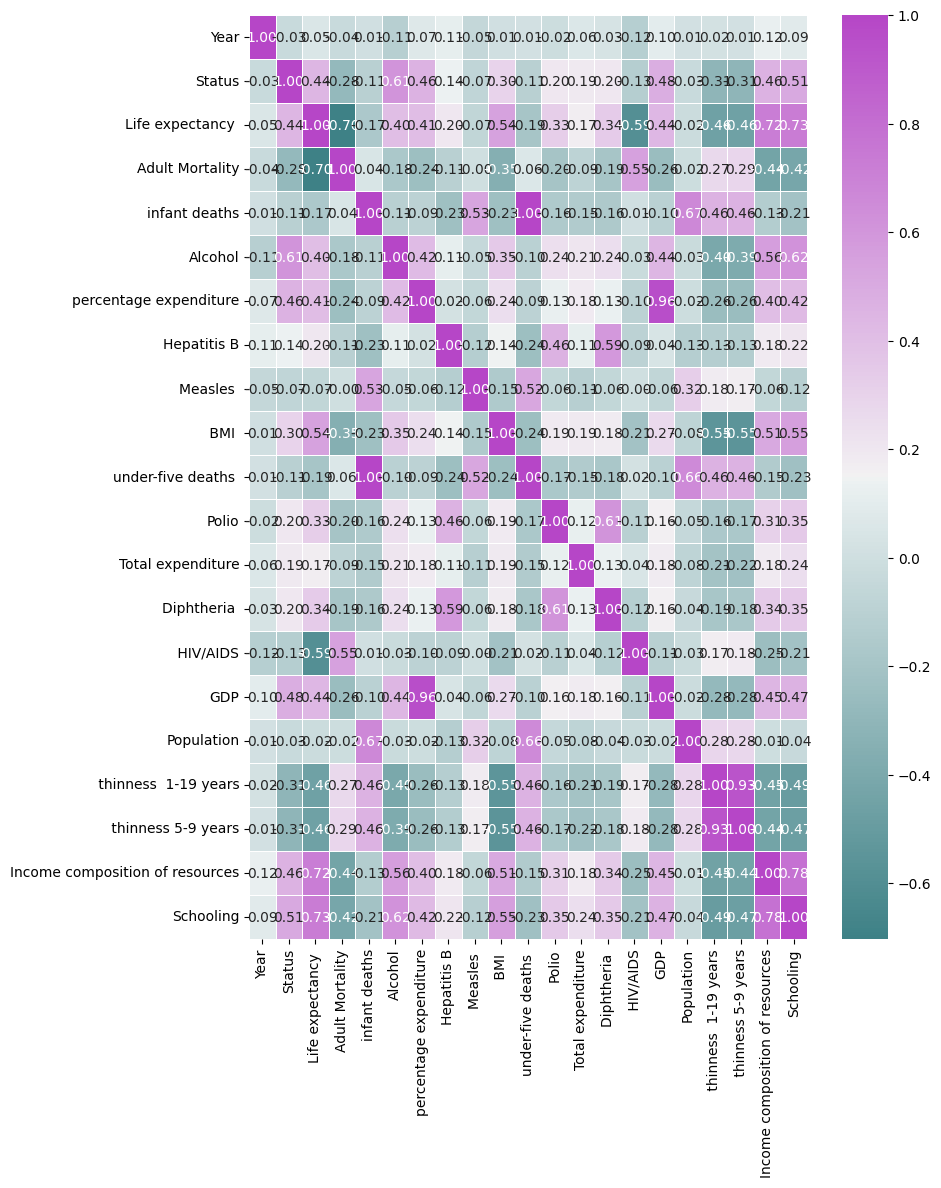

In [41]:
plt.figure(figsize=(9,12))
corr = data.corr()
g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(200,300,as_cmap=True))

Отбросим младенческие смерти, худобу 5-9, расходы в процентах и структуру доходов от ресурсов (?), а также все колонки с низкой корреляцией с целевой: год, корь и население.

In [42]:
data.drop(columns=['Year', 'infant deaths', 'percentage expenditure', 'Measles ', 'Population', ' thinness 5-9 years', 'Income composition of resources'], inplace=True)

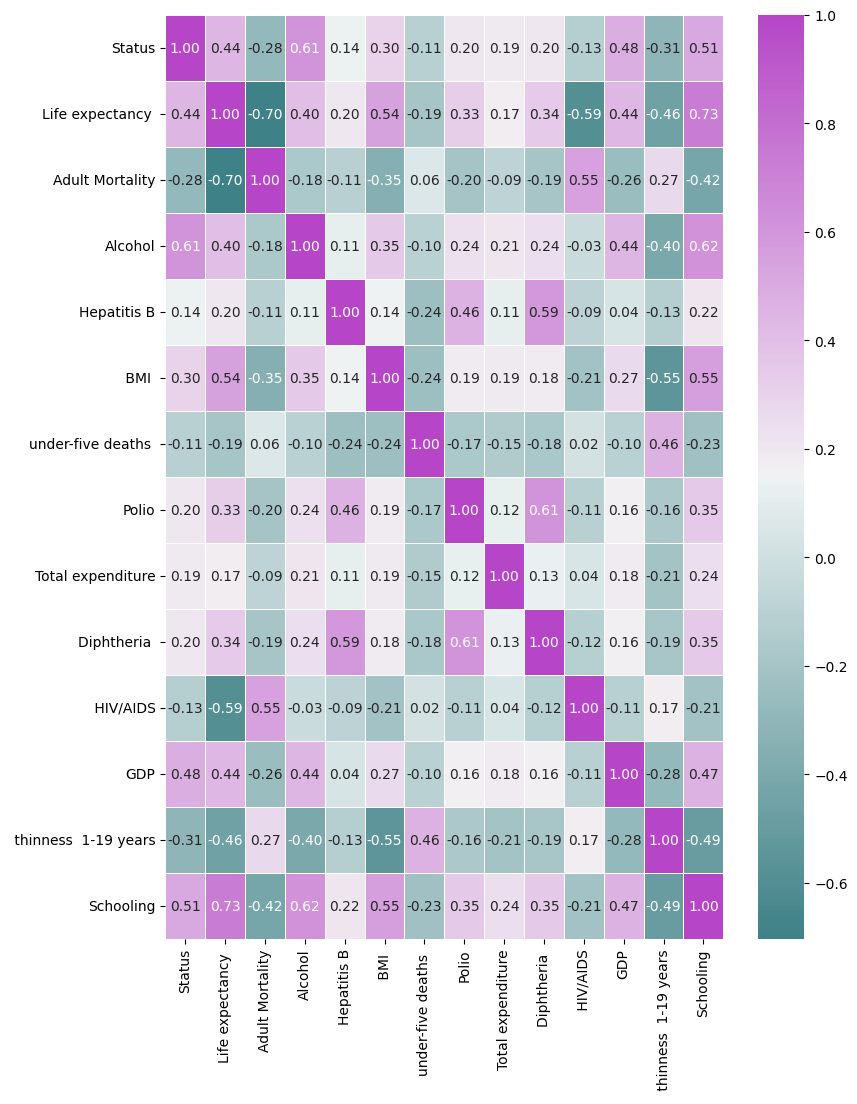

In [43]:
plt.figure(figsize=(9,12))
corr = data.corr()
g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(200,300,as_cmap=True))

In [44]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
X = data.drop(columns=['Life expectancy '])
y = data['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 3.7515891711231744 test: 4.119304620542682


In [45]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, 
                   random_state=179)
lasso_cv.fit(X, y)
print(f'Alpha = {lasso_cv.alpha_}')

Alpha = 0.5974874371859297


In [46]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=lasso_cv.alpha_))])

pipe1.fit(X_train, y_train)
ypred_train = pipe1.predict(X_train)
ypred_test = pipe1.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 3.896885558318654 test: 4.233268620146184


In [47]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)
print(f'Alpha = {ridge_cv.alpha_}')

Alpha = 138.26221737646563


In [48]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=ridge_cv.alpha_))])

pipe2.fit(X_train, y_train)
ypred_train = pipe2.predict(X_train)
ypred_test = pipe2.predict(X_test)

print('Scores: train:', sqrt(mean_squared_error(y_train, ypred_train)), 'test:', sqrt(mean_squared_error(y_test, ypred_test)))

Scores: train: 3.7787000318885955 test: 4.1556364211939965


In [49]:
regressor = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=179)
regressor.fit(X, y)
print(regressor.coef_, regressor.intercept_, sep='\n')

[ 0.00000000e+00 -2.06995280e-02 -0.00000000e+00 -7.01963199e-03
  4.98175447e-02 -1.34761668e-03  1.16611289e-02  9.63945211e-03
  2.89960460e-02 -4.34342272e-01  8.69280365e-05 -4.86623454e-02
  1.11402247e+00]
55.14048583758891
